| **Inicio** | **atrás 27** | **Siguiente 29** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./27.Discretizar_Datos_Numericos.ipynb)| [⏩](./29.Analisis_Componentes_Principales.ipynb)|

# **28. Descubre cómo manejar Datos ó Valores Faltantes Imputando con K-Vecinos más cercanos (KNN)**

## **Qué es la Imputación de valores faltantes**

La imputación de valores faltantes es una técnica de preprocesamiento de datos que consiste en reemplazar los valores faltantes en un conjunto de datos por valores estimados. Esta técnica es útil cuando el conjunto de datos tiene valores faltantes que pueden afectar el rendimiento de los algoritmos de aprendizaje automático.

A continuación se muestra un ejemplo de cómo imputar valores faltantes en una columna de un conjunto de datos con la biblioteca pandas de Python:

In [1]:
import pandas as pd
import numpy as np

# Datos de ejemplo con valores faltantes
datos = pd.DataFrame({'A': [1, 2, np.nan, 4, 5], 'B': [6, np.nan, 8, 9, 10], 'C': [11, 12, 13, np.nan, 15]})

# Imputar valores faltantes con la media de la columna
datos_imputados = datos.fillna(datos.mean())

print(datos_imputados)


     A      B      C
0  1.0   6.00  11.00
1  2.0   8.25  12.00
2  3.0   8.00  13.00
3  4.0   9.00  12.75
4  5.0  10.00  15.00


En este ejemplo, utilizamos la función ```fillna``` de pandas para imputar los valores faltantes en la columna A del conjunto de datos. La función ```mean()``` se utiliza para calcular la media de la columna y reemplazar los valores faltantes por este valor estimado.

## **KNN para imputación con scikit-learn**

KNN (k-nearest neighbors) es un algoritmo de aprendizaje automático utilizado para imputar valores faltantes en un conjunto de datos. La idea detrás de este algoritmo es utilizar los valores de las observaciones más cercanas para imputar los valores faltantes.

A continuación se muestra un ejemplo de cómo utilizar KNN para imputar valores faltantes en un conjunto de datos con la biblioteca scikit-learn de Python:

In [2]:
import pandas as pd
from sklearn.impute import KNNImputer

# Datos de ejemplo con valores faltantes
datos = pd.DataFrame({'A': [1, 2, None, 4, 5], 'B': [6, None, 8, 9, 10], 'C': [11, 12, 13, None, 15]})

# Imputar valores faltantes con KNN
imputer = KNNImputer(n_neighbors=2)
datos_imputados = imputer.fit_transform(datos)

print(datos_imputados)


[[ 1.  6. 11.]
 [ 2.  7. 12.]
 [ 3.  8. 13.]
 [ 4.  9. 14.]
 [ 5. 10. 15.]]


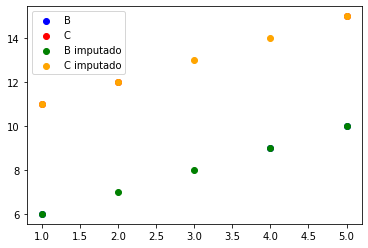

In [3]:
import matplotlib.pyplot as plt

# Gráfica de los datos originales
plt.scatter(datos['A'], datos['B'], color='blue')
plt.scatter(datos['A'], datos['C'], color='red')

# Gráfica de los datos imputados
plt.scatter(datos_imputados[:, 0], datos_imputados[:, 1], color='green')
plt.scatter(datos_imputados[:, 0], datos_imputados[:, 2], color='orange')

plt.legend(['B', 'C', 'B imputado', 'C imputado'])
plt.show()


## **Not a Number (NaN) para indicar valores faltantes**

En Python, los valores faltantes se representan comúnmente con "Not a Number" (NaN) utilizando la biblioteca NumPy. A continuación, se presenta un ejemplo de cómo crear un conjunto de datos con valores faltantes y visualizarlo utilizando un gráfico de dispersión:

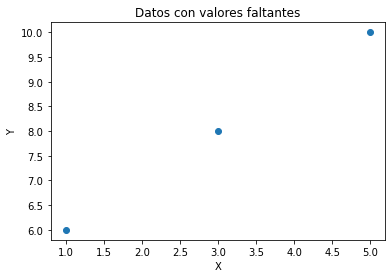

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Crear datos de ejemplo con valores faltantes
x = np.array([1, 2, 3, np.nan, 5])
y = np.array([6, np.nan, 8, 9, 10])

# Graficar los datos
plt.scatter(x, y)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Datos con valores faltantes')
plt.show()


## **Uso de KNN Imputer**

A continuación se presenta un ejemplo de cómo usar el algoritmo de imputación KNN (K-Nearest Neighbors) de la biblioteca scikit-learn en Python para rellenar valores faltantes en un conjunto de datos:

In [5]:
import numpy as np
from sklearn.impute import KNNImputer

# Crear datos de ejemplo con valores faltantes
X = np.array([[1, 2, np.nan], [3, np.nan, 5], [np.nan, 6, 7], [8, 9, 10]])

# Imputar valores faltantes con KNN
imputer = KNNImputer(n_neighbors=2)
X_imputed = imputer.fit_transform(X)

# Imprimir los datos imputados
print(X_imputed)


[[ 1.   2.   6. ]
 [ 3.   4.   5. ]
 [ 5.5  6.   7. ]
 [ 8.   9.  10. ]]


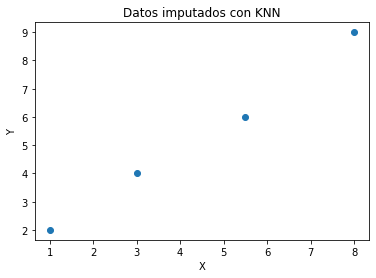

In [6]:
import matplotlib.pyplot as plt

# Graficar los datos imputados
plt.scatter(X_imputed[:, 0], X_imputed[:, 1])

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Datos imputados con KNN')
plt.show()


## **Comparación de técnicas de imputación**

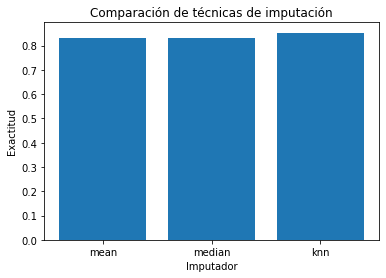

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Cargar el conjunto de datos de ejemplo
iris = load_iris()
X = iris.data
y = iris.target

# Introducir valores faltantes de forma aleatoria
rng = np.random.RandomState(0)
missing_mask = rng.binomial(1, 0.25, size=X.shape).astype(bool)
X[missing_mask] = np.nan

# Crear una lista de imputadores
imputers = [
    ("mean", SimpleImputer(strategy="mean")),
    ("median", SimpleImputer(strategy="median")),
    ("knn", KNNImputer(n_neighbors=5))
]

# Crear un diccionario para almacenar los resultados
results = {}

# Iterar sobre cada imputador y calcular el score
for name, imputer in imputers:
    pipe = Pipeline([
        ('imputer', imputer),
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=2)),
    ])
    X_imputed = pipe.fit_transform(X)
    score = np.mean(cross_val_score(LogisticRegression(), X_imputed, y, scoring="accuracy", cv=5))
    results[name] = score

# Crear un gráfico de barras para comparar los resultados
plt.bar(range(len(results)), list(results.values()), align='center')
plt.xticks(range(len(results)), list(results.keys()))
plt.xlabel('Imputador')
plt.ylabel('Exactitud')
plt.title('Comparación de técnicas de imputación')
plt.show()


| **Inicio** | **atrás 27** | **Siguiente 29** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./27.Discretizar_Datos_Numericos.ipynb)| [⏩](./29.Analisis_Componentes_Principales.ipynb)|